   ## SuperStore Sales Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel('superstore_sales.xlsx')

In [3]:
df.head(2)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011


In [4]:
df.shape

(51290, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [6]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


### Q1. What is the overall sales trend? 

In [9]:
df.order_date.min()

Timestamp('2011-01-01 00:00:00')

In [10]:
df.order_date.max()

Timestamp('2014-12-31 00:00:00')

In [11]:
df['month_year'] = df.order_date.apply(lambda x:x.strftime('%Y-%m'))

In [12]:
trend = df.groupby('month_year').sum()['sales'].reset_index()

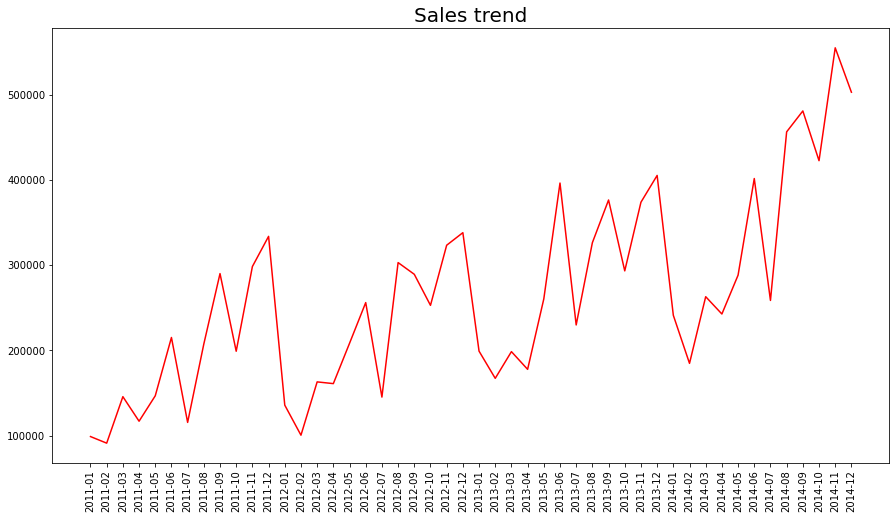

In [13]:
plt.figure(figsize=(15,8))
plt.title('Sales trend',size = 20)
plt.plot(trend['month_year'],trend['sales'], color = 'Red')
plt.xticks(rotation = 'vertical', size = 10);

### Q2. Which are the Top 10 products by sales?

In [14]:
df.head(2)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01


In [15]:
df.product_name

0                                    Tenex Lockers, Blue
1                               Acme Trimmer, High Speed
2                                Tenex Box, Single Width
3                            Enermax Note Cards, Premium
4                             Eldon Light Bulb, Duo Pack
                              ...                       
51285    Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl
51286            Wilson Jones Hole Reinforcements, Clear
51287             Hon Color Coded Labels, 5000 Label Set
51288             Hon Legal Exhibit Labels, Alphabetical
51289                                Bagged Rubber Bands
Name: product_name, Length: 51290, dtype: object

In [16]:
p_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])

In [17]:
p_sales.sort_values('sales', inplace = True, ascending =  False)

In [18]:
p_sales[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


### Q3. Which are the Most Selling Products?

In [19]:
most_selling_pro = pd.DataFrame(df.groupby('product_name').sum()['quantity'])

In [20]:
most_selling_pro.sort_values('quantity',inplace = True, ascending= False)

In [21]:
most_selling_pro[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


### Q4. Which is the most preferred Ship Mode

C:\Users\Saeed Anwar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


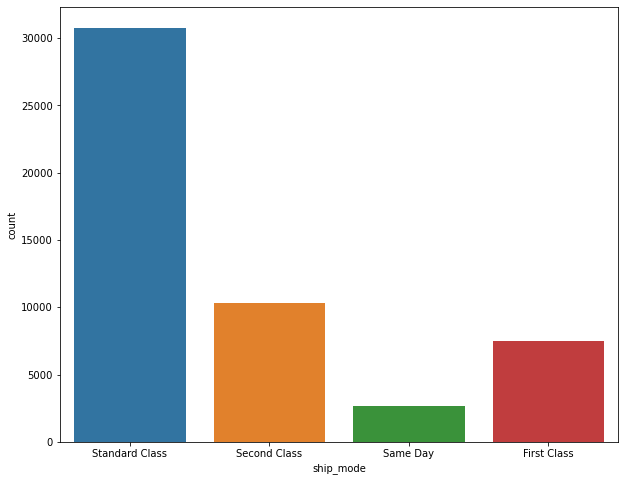

In [22]:
plt.figure(figsize = (10,8))
sns.countplot(df['ship_mode']);

### Q5. Which are the Most Profitable Category and Sub-Category?

In [23]:
profit_cat = pd.DataFrame(df.groupby(['category','sub_category']).sum()['profit'])

In [24]:
profit_cat.sort_values(['category','sub_category'],ascending=False)

profit
category        sub_category              
Technology      Phones        216717.00580
                Machines       58867.87300
                Copiers       258567.54818
                Accessories   129626.30620
Office Supplies Supplies       22583.26310
                Storage       108461.48980
                Paper          59207.68270
                Labels         15010.51200
                Fasteners      11525.42410
                Envelopes      29601.11630
                Binders        72449.84600
                Art            57953.91090
                Appliances    141680.58940
Furniture       Tables        -64083.38870
                Furnishings    46967.42550
                Chairs        141973.79750
                Bookcases     161924.41950